In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

ModuleNotFoundError: No module named 'pandas'

In [7]:
df = pd.read_excel('data_preprocess\export-pm25_eng-1h.xlsx')
# df.to_csv("data_preprocess/export-pm25-1h.csv", index=False)

In [8]:
# df = pd.read_csv("data_preprocess/export-pm25-1h.csv")
df.head()

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
0,0,2023-03-31 22:00:00,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784
1,1,2023-04-02 18:00:00,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966
2,2,2023-04-02 19:00:00,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829
3,3,2023-04-02 20:00:00,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227
4,4,2023-04-02 21:00:00,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888


In [9]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # แปลงให้เป็น datetime
df = df.set_index('timestamp')  # ตั้งค่า index เป็น timestamp
df = df.sort_index()  # เรียงลำดับตามเวลาฃ
df

,Unnamed: 0,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
timestamp,,,,,,,,,,,
2023-03-31 22:00:00.000,0,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,1,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,2,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,3,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,4,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,14791,Asia/Bangkok,90.929747,42.294118,37.568627,36.882353,23.684319,8,1,2,11
2025-02-11 09:00:00.000,14792,Asia/Bangkok,83.511569,42.916667,38.800000,41.166667,25.896389,9,1,2,11
2025-02-11 10:00:00.000,14793,Asia/Bangkok,72.046736,27.533333,23.333333,19.466667,28.852626,10,1,2,11


In [11]:
df

,Unnamed: 0,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
timestamp,,,,,,,,,,,
2023-03-31 22:00:00.000,0,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,1,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,2,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,3,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,4,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,14791,Asia/Bangkok,90.929747,42.294118,37.568627,36.882353,23.684319,8,1,2,11
2025-02-11 09:00:00.000,14792,Asia/Bangkok,83.511569,42.916667,38.800000,41.166667,25.896389,9,1,2,11
2025-02-11 10:00:00.000,14793,Asia/Bangkok,72.046736,27.533333,23.333333,19.466667,28.852626,10,1,2,11


***Clean Data step 1***
1. Drop 'Unnamed: 0' column ; not have impact for model
2. Drop 'timezone' column ; Model use in thailand only\
3. Drop 'pm_10' column ;
4. Drop 'pm_2_5_sp' column ;

In [12]:
df_use = df.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)
df_use.head()

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2023-03-31 22:00:00,62.659563,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00,69.995698,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00,65.608215,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00,65.489705,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00,65.811462,9.083333,31.412888,21,6,4,2


***Clean Data step 2***
1. Check null value and drop row ; cant use mean to instead, that have impact to model
2. Check outlier by boxplot

In [13]:
df_use.isnull().sum()
df_use = df_use.dropna()
df_use.isnull().sum()

humidity       0
pm_2_5         0
temperature    0
hour           0
dayofweek      0
month          0
day            0
dtype: int64

In [14]:
print(df_use['pm_2_5'].describe())
print(df_use['temperature'].describe())
print(df_use['humidity'].describe())

count    14792.000000
mean        21.195190
std         13.094135
min          1.421053
25%         11.233333
50%         18.848870
75%         29.450000
max        184.366667
Name: pm_2_5, dtype: float64
count    14792.000000
mean        29.699716
std          4.760888
min         20.419051
25%         26.383601
50%         28.508779
75%         31.404870
max         52.070282
Name: temperature, dtype: float64
count    14792.000000
mean        78.569546
std         13.272735
min         39.496231
25%         67.330850
50%         80.051360
75%         89.818908
max        100.000000
Name: humidity, dtype: float64


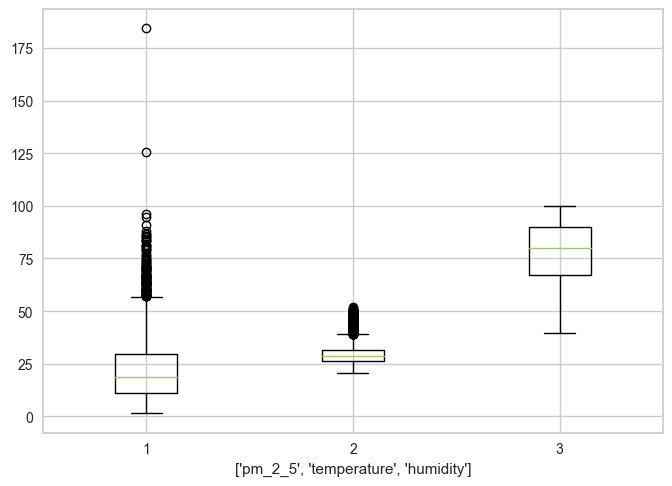

In [15]:
plt.boxplot(df_use[['pm_2_5', 'temperature', 'humidity']])
plt.xlabel(['pm_2_5', 'temperature', 'humidity'])
plt.show()

In [ ]:
# df_use['temperature'] = df_use['temperature'].apply(lambda x: x if x < 36 else np.nan) # remove outliers
# df_use['humidity'] = df_use['humidity'].apply(lambda x: x if x < 100 else np.nan) # remove outliers
# df_use['pm_2_5'] = df_use['pm_2_5'].apply(lambda x: x if x < 55 else np.nan) # remove outliers

In [16]:
df_use.isnull().sum()
df_use = df_use.dropna()
df_use.isnull().sum()

humidity       0
pm_2_5         0
temperature    0
hour           0
dayofweek      0
month          0
day            0
dtype: int64

In [17]:
print(df_use['pm_2_5'].describe())
print(df_use['temperature'].describe())
print(df_use['humidity'].describe())

count    14792.000000
mean        21.195190
std         13.094135
min          1.421053
25%         11.233333
50%         18.848870
75%         29.450000
max        184.366667
Name: pm_2_5, dtype: float64
count    14792.000000
mean        29.699716
std          4.760888
min         20.419051
25%         26.383601
50%         28.508779
75%         31.404870
max         52.070282
Name: temperature, dtype: float64
count    14792.000000
mean        78.569546
std         13.272735
min         39.496231
25%         67.330850
50%         80.051360
75%         89.818908
max        100.000000
Name: humidity, dtype: float64


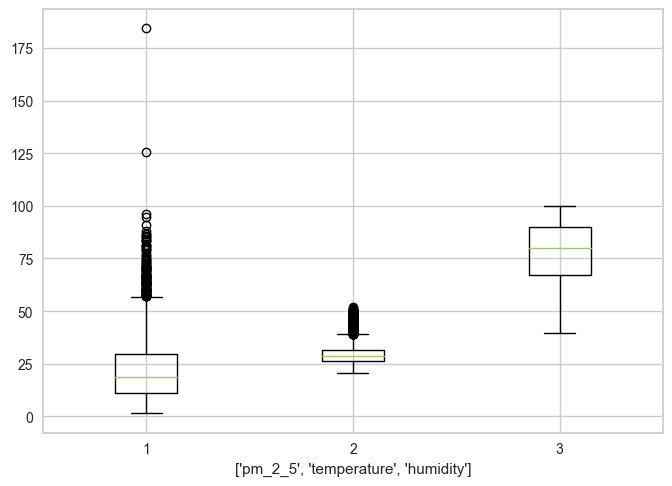

In [18]:
plt.boxplot(df_use[['pm_2_5', 'temperature', 'humidity']])
plt.xlabel(['pm_2_5', 'temperature', 'humidity'])
plt.show()

In [19]:
from scipy import stats
df_use = df_use[(np.abs(stats.zscore(df_use['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df_use = df_use[(np.abs(stats.zscore(df_use['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df_use = df_use[(np.abs(stats.zscore(df_use['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

***Chose feature use to be parametre***
humidity temperature and timestamp

In [21]:
ex = setup(data=df_use, target='pm_2_5', fold=5, train_size=0.8, session_id=123, iterative_imputation_iters=100, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(14316, 7)"
4,Transformed data shape,"(13743, 7)"
5,Transformed train set shape,"(10879, 7)"
6,Transformed test set shape,"(2864, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [23]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.6427,39.9777,6.3225,0.7421,0.3759,0.3852,0.2880
rf,Random Forest Regressor,5.4725,53.4444,7.3092,0.6551,0.4281,0.4633,0.4580
lightgbm,Light Gradient Boosting Machine,6.4971,68.0686,8.2498,0.5610,0.4794,0.5517,0.1580
knn,K Neighbors Regressor,7.0888,86.6283,9.3060,0.4412,0.5222,0.5988,0.0720
gbr,Gradient Boosting Regressor,8.0881,102.2845,10.1119,0.3405,0.5684,0.7079,0.2520
dt,Decision Tree Regressor,7.0046,108.0499,10.3790,0.3020,0.5607,0.5166,0.0660
ada,AdaBoost Regressor,9.4767,129.3494,11.3719,0.1659,0.6628,0.9519,0.1080
en,Elastic Net,9.3957,133.9731,11.5734,0.1360,0.6483,0.8796,0.0580
br,Bayesian Ridge,9.3839,133.9728,11.5731,0.1360,0.6466,0.8736,0.0520
lar,Least Angle Regression,9.3832,133.9821,11.5735,0.1360,0.6465,0.8732,0.0560


In [24]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.2316,33.4309,5.7819,0.7841,0.3589,0.3639


,humidity,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
timestamp,,,,,,,,
2024-06-17 02:00:00,88.401115,25.652927,2,0,6,17,13.533334,11.714678
2023-08-07 22:00:00,66.130981,29.928787,22,0,8,7,21.850000,18.982597
2024-05-21 23:00:00,85.341049,28.169956,23,1,5,21,18.400000,21.742894
2023-12-25 06:00:00,94.576744,25.765863,6,0,12,25,11.550000,12.403729
2023-10-08 23:00:00,99.931999,25.401543,23,6,10,8,47.316666,32.891672
...,...,...,...,...,...,...,...,...
2024-02-19 18:00:00,78.618622,29.589809,18,0,2,19,13.433333,15.937416
2025-02-02 13:00:00,52.252815,32.746887,13,6,2,2,39.733334,37.578815
2023-10-08 19:00:00,99.847031,26.254293,19,6,10,8,49.566666,27.621729


In [25]:
df_test = pd.read_excel('data_preprocess\export-r202_test_nbiot-1h.xlsx')
df_test['hour'] = df_test['timestamp'].dt.hour
df_test['dayofweek'] = df_test['timestamp'].dt.dayofweek
df_test['month'] = df_test['timestamp'].dt.month
df_test['day'] = df_test['timestamp'].dt.day

In [26]:
df_test

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
0,0,2022-08-25 21:00:00,Asia/Bangkok,NaN,1.000000,1.000000,1.000000,NaN,21,3,8,25
1,1,2023-04-09 13:00:00,Asia/Bangkok,60.127563,4.100000,3.500000,3.500000,25.209442,13,6,4,9
2,2,2023-04-09 14:00:00,Asia/Bangkok,52.371216,4.250000,3.916667,3.916667,26.126556,14,6,4,9
3,3,2023-04-09 15:00:00,Asia/Bangkok,51.104058,11.166667,10.944444,10.944444,35.803477,15,6,4,9
4,4,2023-04-09 16:00:00,Asia/Bangkok,50.511863,12.000000,11.590909,11.590909,36.056519,16,6,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10108,10108,2024-06-26 12:00:00,Asia/Bangkok,62.034445,47.700000,40.650000,49.483333,32.720980,12,2,6,26
10109,10109,2024-06-26 13:00:00,Asia/Bangkok,57.990636,40.683333,35.633333,39.900000,33.358209,13,2,6,26
10110,10110,2024-06-26 14:00:00,Asia/Bangkok,66.245378,50.116667,42.216667,52.900000,32.688989,14,2,6,26
10111,10111,2024-06-26 15:00:00,Asia/Bangkok,74.005099,57.200000,47.183333,63.933333,31.436409,15,2,6,26


In [27]:
predict_model(best_model, data=df_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,6.6007,89.0136,9.4347,0.5416,0.5347,0.6976


,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5_sp,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
0,0,2022-08-25 21:00:00,Asia/Bangkok,NaN,1.000000,1.000000,NaN,21,3,8,25,1.000000,18.319380
1,1,2023-04-09 13:00:00,Asia/Bangkok,60.127563,4.100000,3.500000,25.209442,13,6,4,9,3.500000,18.140293
2,2,2023-04-09 14:00:00,Asia/Bangkok,52.371216,4.250000,3.916667,26.126556,14,6,4,9,3.916667,16.985777
3,3,2023-04-09 15:00:00,Asia/Bangkok,51.104057,11.166667,10.944445,35.803478,15,6,4,9,10.944445,15.521343
4,4,2023-04-09 16:00:00,Asia/Bangkok,50.511864,12.000000,11.590909,36.056519,16,6,4,9,11.590909,14.857775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,10108,2024-06-26 12:00:00,Asia/Bangkok,62.034443,47.700001,49.483334,32.720982,12,2,6,26,40.650002,33.069959
10109,10109,2024-06-26 13:00:00,Asia/Bangkok,57.990635,40.683334,39.900002,33.358208,13,2,6,26,35.633335,33.364476
10110,10110,2024-06-26 14:00:00,Asia/Bangkok,66.245377,50.116665,52.900002,32.688988,14,2,6,26,42.216667,35.595405
10111,10111,2024-06-26 15:00:00,Asia/Bangkok,74.005096,57.200001,63.933334,31.436409,15,2,6,26,47.183334,36.449578


In [ ]:
df_use

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2023-03-31 22:00:00.000,62.659563,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,69.995698,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,65.608215,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,65.489705,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,65.811462,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,90.929747,37.568627,23.684319,8,1,2,11
2025-02-11 09:00:00.000,83.511569,38.800000,25.896389,9,1,2,11
2025-02-11 10:00:00.000,72.046736,23.333333,28.852626,10,1,2,11


In [37]:
# กำหนดช่วงเวลาที่ต้องการพยากรณ์ (7 วันข้างหน้า)
future_dates = pd.date_range(start=df_use.index[-1], periods=8, freq='D')[1:]

# สร้าง DataFrame สำหรับพยากรณ์
future_df = pd.DataFrame(index=future_dates)
future_df['hour'] = future_df.index.hour
future_df['dayofweek'] = future_df.index.dayofweek
future_df['month'] = future_df.index.month
future_df['day'] = future_df.index.day

import numpy as np

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของอุณหภูมิและความชื้นในอดีต
temp_mean = df_use['temperature'].mean()
temp_std = df_use['temperature'].std()

humidity_mean = df_use['humidity'].mean()
humidity_std = df_use['humidity'].std()

# สุ่มค่าโดยอิงแนวโน้มของค่าก่อนหน้า ± ตามแนวโน้ม
future_df['temperature'] = np.random.normal(temp_mean, temp_std, len(future_df))
future_df['humidity'] = np.random.normal(humidity_mean, humidity_std, len(future_df))

# ตรวจสอบว่าค่าที่สุ่มได้ไม่เกินขอบเขตที่สมเหตุสมผล (เช่น อุณหภูมิไม่ควรต่ำกว่า 0 หรือสูงกว่า 50)
future_df['temperature'] = future_df['temperature'].clip(lower=0, upper=50)
future_df['humidity'] = future_df['humidity'].clip(lower=0, upper=100)

print(future_df)



                         hour  dayofweek  month  day  temperature    humidity
2025-02-12 11:15:35.967    11          2      2   12    27.707560  100.000000
2025-02-13 11:15:35.967    11          3      2   13    31.585979   62.495618
2025-02-14 11:15:35.967    11          4      2   14    30.640334   65.779612
2025-02-15 11:15:35.967    11          5      2   15    29.231538  100.000000
2025-02-16 11:15:35.967    11          6      2   16    38.897157   68.876164
2025-02-17 11:15:35.967    11          0      2   17    30.939136   79.523808
2025-02-18 11:15:35.967    11          1      2   18    33.213925   92.897040


In [38]:
future_df = future_df[df_use.columns.drop('pm_2_5')]  # เรียงตาม df_use (ยกเว้น pm_2_5)

In [41]:
predictions = predict_model(best_model, data=future_df)
print(predictions.head())  # ดูว่ามีคอลัมน์อะไรบ้าง

                           humidity  temperature  hour  dayofweek  month  day  \
2025-02-12 11:15:35.967  100.000000    27.707560    11          2      2   12   
2025-02-13 11:15:35.967   62.495617    31.585979    11          3      2   13   
2025-02-14 11:15:35.967   65.779610    30.640333    11          4      2   14   
2025-02-15 11:15:35.967  100.000000    29.231537    11          5      2   15   
2025-02-16 11:15:35.967   68.876167    38.897156    11          6      2   16   

                         prediction_label  
2025-02-12 11:15:35.967         27.853064  
2025-02-13 11:15:35.967         20.794116  
2025-02-14 11:15:35.967         23.071861  
2025-02-15 11:15:35.967         26.307276  
2025-02-16 11:15:35.967         23.135492  


In [42]:
df_use.tail(7)

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2025-02-10 21:00:00.000,77.279939,28.533333,26.323620,21,0,2,10
2025-02-10 22:00:00.000,78.573505,31.325581,26.209783,22,0,2,10
2025-02-11 08:00:00.000,90.929747,37.568627,23.684319,8,1,2,11
2025-02-11 09:00:00.000,83.511569,38.800000,25.896389,9,1,2,11
2025-02-11 10:00:00.000,72.046736,23.333333,28.852626,10,1,2,11
2025-02-11 11:00:00.000,64.332405,21.850000,30.593716,11,1,2,11
2025-02-11 11:15:35.967,61.046112,21.000000,31.861472,11,1,2,11


In [45]:
# ทำนายค่า pm_2_5
future_df['pm_2_5_predicted'] = predict_model(best_model, data=future_df)['prediction_label']
print(future_df)
print(df_use['pm_2_5'].tail(7))

                           humidity  temperature  hour  dayofweek  month  day  \
2025-02-12 11:15:35.967  100.000000    27.707560    11          2      2   12   
2025-02-13 11:15:35.967   62.495618    31.585979    11          3      2   13   
2025-02-14 11:15:35.967   65.779612    30.640334    11          4      2   14   
2025-02-15 11:15:35.967  100.000000    29.231538    11          5      2   15   
2025-02-16 11:15:35.967   68.876164    38.897157    11          6      2   16   
2025-02-17 11:15:35.967   79.523808    30.939136    11          0      2   17   
2025-02-18 11:15:35.967   92.897040    33.213925    11          1      2   18   

                         pm_2_5_predicted  
2025-02-12 11:15:35.967         27.853064  
2025-02-13 11:15:35.967         20.794116  
2025-02-14 11:15:35.967         23.071861  
2025-02-15 11:15:35.967         26.307276  
2025-02-16 11:15:35.967         23.135492  
2025-02-17 11:15:35.967         19.218864  
2025-02-18 11:15:35.967         21.115182  